<a href="https://colab.research.google.com/github/RYOTA2528/data_analysis_practice/blob/main/%5B78%E3%81%8B%E3%82%8980%E6%9C%AC%E7%9B%AE%5D%E3%83%92%E3%83%BC%E3%83%88%E3%83%9E%E3%83%83%E3%83%97%E3%83%BB%E6%A3%92%E3%82%B0%E3%83%A9%E3%83%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [1から5本目]データの読み込みから型変換まで

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
import pandas as pd

In [87]:
sales_df = pd.read_csv("/content/drive/MyDrive/Python100本ノック用/Sales_Data.csv")
member_df = pd.read_csv("/content/drive/MyDrive/Python100本ノック用/Member_Data.csv")

In [88]:
sales_df.head(5)

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount
0,1,2024/5/1 0:00,21,25,12,3,5820
1,2,2024/5/1 2:55,107,23,17,1,640
2,3,2024/5/1 5:51,117,24,6,3,1270
3,4,2024/5/1 8:47,124,38,1,3,5980
4,5,2024/5/1 11:43,281,28,5,4,9390


In [89]:
member_df.tail(5)

,Member_ID,Gender,Age,Days_Since_Registration
295,296,Male,41,1513
296,297,Female,58,1613
297,298,Female,71,1177
298,299,Female,38,1660
299,300,Female,50,104


In [90]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction_ID    1000 non-null   int64 
 1   Transaction_Date  1000 non-null   object
 2   Member_ID         1000 non-null   int64 
 3   Product_ID        1000 non-null   int64 
 4   Store_ID          1000 non-null   int64 
 5   Quantity          1000 non-null   int64 
 6   Amount            1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


In [91]:
# 各種IDを文字列に変換
sales_df["Transaction_ID"] = sales_df["Transaction_ID"].astype("string")
sales_df["Member_ID"] = sales_df["Member_ID"].astype("string")
sales_df["Product_ID"] = sales_df["Product_ID"].astype("string")
sales_df["Store_ID"] = sales_df["Store_ID"].astype("string")
sales_df["Transaction_ID"] = sales_df["Transaction_ID"].astype("string")

In [92]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction_ID    1000 non-null   string
 1   Transaction_Date  1000 non-null   object
 2   Member_ID         1000 non-null   string
 3   Product_ID        1000 non-null   string
 4   Store_ID          1000 non-null   string
 5   Quantity          1000 non-null   int64 
 6   Amount            1000 non-null   int64 
dtypes: int64(2), object(1), string(4)
memory usage: 54.8+ KB


## [6から10本目]データの型変換からqueryの使い方まで

In [93]:
#[6] 日付データをdataTime型に変換
sales_df["Transaction_Date"] = pd.to_datetime(sales_df["Transaction_Date"] )

In [94]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    1000 non-null   string        
 1   Transaction_Date  1000 non-null   datetime64[ns]
 2   Member_ID         1000 non-null   string        
 3   Product_ID        1000 non-null   string        
 4   Store_ID          1000 non-null   string        
 5   Quantity          1000 non-null   int64         
 6   Amount            1000 non-null   int64         
dtypes: datetime64[ns](1), int64(2), string(4)
memory usage: 54.8 KB


In [95]:
#[7] 取引データの各列の基本的な統計情報の表示
sales_df.describe()

,Transaction_Date,Quantity,Amount
count,1000,1000.000000,1000.000000
mean,2024-06-30 23:59:30.299999744,2.551000,5338.650000
min,2024-05-01 00:00:00,1.000000,510.000000
25%,2024-05-31 11:59:15,2.000000,3022.500000
50%,2024-06-30 23:59:30,3.000000,5250.000000
75%,2024-07-31 11:59:45,4.000000,7752.500000
max,2024-08-31 00:00:00,4.000000,10000.000000
std,NaN,1.103003,2778.234487


In [96]:
# [8]カラム名の変更
sales_df.rename(columns={"Amount": "Sales_Amount"})

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Sales_Amount
0,1,2024-05-01 00:00:00,21,25,12,3,5820
1,2,2024-05-01 02:55:00,107,23,17,1,640
2,3,2024-05-01 05:51:00,117,24,6,3,1270
3,4,2024-05-01 08:47:00,124,38,1,3,5980
4,5,2024-05-01 11:43:00,281,28,5,4,9390
...,...,...,...,...,...,...,...
995,996,2024-08-30 12:16:00,213,33,15,3,8400
996,997,2024-08-30 15:12:00,62,49,19,3,3930
997,998,2024-08-30 18:08:00,49,12,11,4,2530
998,999,2024-08-30 21:04:00,127,11,15,3,4160


In [97]:
# [9] Amountを100円単に四捨五入
sales_df["Amount"].round(-2)

,Amount
0,5800
1,600
2,1300
3,6000
4,9400
...,...
995,8400
996,3900
997,2500
998,4200


In [98]:
# [10] 取引データからAmountが5000円を超える取引を抽出
sales_df.query("Amount > 5000")

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount
0,1,2024-05-01 00:00:00,21,25,12,3,5820
3,4,2024-05-01 08:47:00,124,38,1,3,5980
4,5,2024-05-01 11:43:00,281,28,5,4,9390
5,6,2024-05-01 14:39:00,292,21,14,4,8730
6,7,2024-05-01 17:35:00,203,43,5,3,9830
...,...,...,...,...,...,...,...
991,992,2024-08-30 00:33:00,258,19,14,1,7220
992,993,2024-08-30 03:29:00,81,18,13,3,7610
994,995,2024-08-30 09:20:00,235,8,12,1,7880
995,996,2024-08-30 12:16:00,213,33,15,3,8400


## [11から15本目]queryの様々な使い方(ノック)

In [99]:
# [11]会員データから30歳から50歳の会員を抽出してください
member_df.query("30 <= Age <=50")

,Member_ID,Gender,Age,Days_Since_Registration
3,4,Female,49,1881
8,9,Male,48,1640
9,10,Female,48,1317
12,13,Male,41,1855
13,14,Male,33,928
...,...,...,...,...
292,293,Female,35,388
293,294,Male,32,1127
295,296,Male,41,1513
298,299,Female,38,1660


In [100]:
# [12]取引データから"2024-08-01"以降に行われた取引を抽出
sales_df.query("Transaction_Date >= '2024-08-01'") #''で囲うこと
# sales_df.columns

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount
754,755,2024-08-01 01:55:00,226,17,14,4,8640
755,756,2024-08-01 04:51:00,131,18,18,3,960
756,757,2024-08-01 07:47:00,76,45,13,3,1910
757,758,2024-08-01 10:42:00,286,29,11,1,4430
758,759,2024-08-01 13:38:00,277,20,16,1,5090
...,...,...,...,...,...,...,...
995,996,2024-08-30 12:16:00,213,33,15,3,8400
996,997,2024-08-30 15:12:00,62,49,19,3,3930
997,998,2024-08-30 18:08:00,49,12,11,4,2530
998,999,2024-08-30 21:04:00,127,11,15,3,4160


In [101]:
# [13]Store_ID が「1」または「3」で、かつ Amount が5000円以上の取引を抽出
sales_df.query("(Store_ID == '1' or Store_ID == '1') and Amount >= 5000")

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount
3,4,2024-05-01 08:47:00,124,38,1,3,5980
7,8,2024-05-01 20:30:00,51,18,1,4,5510
17,18,2024-05-03 01:49:00,156,3,1,3,7620
86,87,2024-05-11 12:03:00,77,37,1,2,8500
95,96,2024-05-12 14:26:00,167,9,1,3,5370
129,130,2024-05-16 18:05:00,259,1,1,2,9480
188,189,2024-05-23 23:00:00,12,11,1,2,9920
210,211,2024-05-26 15:29:00,25,8,1,4,9390
279,280,2024-06-04 01:43:00,133,3,1,4,8210
280,281,2024-06-04 04:39:00,183,14,1,1,5570


In [102]:
# [14] Product_ID が「10」、「20」、「30」のいずれかに一致する取引
sales_df.query("Product_ID in ['10', '20', '30']")

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount
13,14,2024-05-02 14:06:00,52,30,2,1,8650
41,42,2024-05-06 00:10:00,47,20,12,1,3060
44,45,2024-05-06 08:57:00,277,10,10,4,6870
69,70,2024-05-09 10:14:00,164,30,9,3,4650
84,85,2024-05-11 06:11:00,138,30,2,3,1750
167,168,2024-05-21 09:27:00,288,20,5,1,6520
227,228,2024-05-28 17:19:00,288,10,9,4,3570
236,237,2024-05-29 19:41:00,43,30,17,3,9630
237,238,2024-05-29 22:37:00,254,30,12,3,6460
247,248,2024-05-31 03:56:00,253,30,16,4,1090


In [103]:
# [15]  Product_ID が「10」、「20」、「30」ではない取引を抽出
sales_df.query("Product_ID not in ['10', '20', '30']")

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount
0,1,2024-05-01 00:00:00,21,25,12,3,5820
1,2,2024-05-01 02:55:00,107,23,17,1,640
2,3,2024-05-01 05:51:00,117,24,6,3,1270
3,4,2024-05-01 08:47:00,124,38,1,3,5980
4,5,2024-05-01 11:43:00,281,28,5,4,9390
...,...,...,...,...,...,...,...
995,996,2024-08-30 12:16:00,213,33,15,3,8400
996,997,2024-08-30 15:12:00,62,49,19,3,3930
997,998,2024-08-30 18:08:00,49,12,11,4,2530
998,999,2024-08-30 21:04:00,127,11,15,3,4160


## [16から20本目]queryの使い方(続き)からgroupbyの使い方

In [104]:
# [16] Quantity が最頻値で、かつ Store_ID が「3」の取引を抽出
mode_quantity = sales_df["Quantity"].mode() #mode()で最頻値取得
# mode_quantity
sales_df.query("Quantity == @mode_quantity and Store_ID == '3'") #変数取得は@

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount


In [105]:
# [17] Amount が第1四分位(25%の箇所)から第3四分位(75%の箇所)の範囲に属する取引を抽出
# sales_df["Amount"]
q1 = sales_df["Amount"].quantile(0.25)
q3 = sales_df["Amount"].quantile(0.75)
sales_df.query("@q1 >= Amount <= @q3")
# print(q1)
# print(q3)

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount
1,2,2024-05-01 02:55:00,107,23,17,1,640
2,3,2024-05-01 05:51:00,117,24,6,3,1270
16,17,2024-05-02 22:53:00,239,32,4,3,2680
32,33,2024-05-04 21:47:00,159,34,6,2,3000
36,37,2024-05-05 09:30:00,36,4,18,4,2430
...,...,...,...,...,...,...,...
982,983,2024-08-28 22:10:00,28,2,5,2,2020
984,985,2024-08-29 04:02:00,84,37,6,4,2720
986,987,2024-08-29 09:53:00,117,7,18,2,790
993,994,2024-08-30 06:24:00,268,16,7,1,2370


In [106]:
# [18] Product_IDとStore_IDは何種類あるか確認
print(sales_df['Product_ID'].nunique())
print(sales_df['Store_ID'].nunique())

50
20


In [107]:
# [19] 取引データのProduct_ID ごとに Amount の合計を計算
sales_df.groupby("Product_ID")["Amount"].sum()

,Amount
Product_ID,
1,121370
10,92090
11,138860
12,63900
13,139100
14,70100
15,68080
16,105910
17,169320


In [108]:
# 20 Product_ID ごとにQuantityの中央値を計算
sales_df.groupby("Product_ID")["Quantity"].median()

,Quantity
Product_ID,
1,2.0
10,3.0
11,3.0
12,3.0
13,2.0
14,3.0
15,2.5
16,3.0
17,2.0


## [21から25本目]日付の扱いとソートの使い方

In [109]:
# [21] Store_ID ごとに平均Amountを集計してください
sales_df.groupby("Store_ID")["Amount"].mean()

,Amount
Store_ID,
1,5875.111111
10,5295.961538
11,4872.400000
12,5615.681818
13,5811.186441
14,5879.111111
15,5587.343750
16,5189.803922
17,4724.492754


In [110]:
# [22] 会員データの性別 (Gender) ごとに平均年齢を計算
member_df.groupby("Gender")["Age"].mean()

,Age
Gender,
Female,48.945205
Male,53.259740


In [111]:
# [23] 会員ごとに平均Amountを計算してください
sales_df.groupby("Member_ID")["Amount"].mean()

,Amount
Member_ID,
1,4985.000000
10,6360.000000
100,7140.000000
101,6085.000000
102,4297.500000
...,...
95,1310.000000
96,3330.000000
97,3036.666667


In [112]:
# [24] Transaction_Dateから日付だけ取り出して日付ごとに Amount の合計を集計
# sales_df["Transaction_Date"]
sales_df["Transaction_Date_yyyyMMdd"] = sales_df['Transaction_Date'].dt.date #日付だけとりだす
sales_df["Transaction_Date_yyyyMMdd"]
sales_df.groupby("Transaction_Date_yyyyMMdd")["Amount"].sum()

,Amount
Transaction_Date_yyyyMMdd,
2024-05-01,55160
2024-05-02,47770
2024-05-03,52060
2024-05-04,38830
2024-05-05,47370
...,...
2024-08-27,42500
2024-08-28,34250
2024-08-29,42680


In [113]:
# [25] 日付ごとの合計Amountを集計し、合計Amountが小さい順にソート
# "Transaction_Date_yyyyMMdd" の日付がインデックスになっているため、まずはreset_index()で構造を見やすくする
sales_df.groupby("Transaction_Date_yyyyMMdd")["Amount"].sum().reset_index().sort_values(by="Amount", ascending=True)


,Transaction_Date_yyyyMMdd,Amount
122,2024-08-31,7530
51,2024-06-21,24120
20,2024-05-21,25140
114,2024-08-23,28120
68,2024-07-08,28970
...,...,...
24,2024-05-25,57490
39,2024-06-09,57500
117,2024-08-26,59750
84,2024-07-24,60630


## [26から30本目]週や曜日ごとの集計方法

In [114]:
# [26] 月ごとに Amount を集計
sales_df["Month"] = sales_df['Transaction_Date'].dt.to_period("M")
sales_df.groupby("Month")["Amount"].sum()

,Amount
Month,
2024-05,1374890
2024-06,1282280
2024-07,1355570
2024-08,1325910


In [115]:
# [27] 月ごとのAmountの増減の絶対値を前月と比較して計算
monthly_sales = sales_df.groupby("Month")["Amount"].sum().reset_index()
monthly_sales["Amount"].diff()

,Amount
0,NaN
1,-92610.0
2,73290.0
3,-29660.0


In [116]:
# [28] 曜日ごとの合計Amountを集計
sales_df["Day_of_Week"] = sales_df['Transaction_Date'].dt.day_name()
sales_df.groupby("Day_of_Week")["Amount"].sum()

,Amount
Day_of_Week,
Friday,745610
Monday,719260
Saturday,752010
Sunday,765580
Thursday,791610
Tuesday,722620
Wednesday,841960


In [117]:
# [29] 1週間ごとに合計Amountを集計
sales_df["Week"] = sales_df["Transaction_Date"].dt.to_period("W")
sales_df.groupby("Week")["Amount"].sum()

,Amount
Week,
2024-04-29/2024-05-05,241190
2024-05-06/2024-05-12,311410
2024-05-13/2024-05-19,305180
2024-05-20/2024-05-26,309750
2024-05-27/2024-06-02,290200
2024-06-03/2024-06-09,312650
2024-06-10/2024-06-16,300020
2024-06-17/2024-06-23,281970
2024-06-24/2024-06-30,304800


In [118]:
# [30] 1週間ごとのAmountの増減を計算し、増加率をパーセンテージで表示
weekly_sales = sales_df.groupby("Week")["Amount"].sum().reset_index()
weekly_sales["Amount"].pct_change()*100 #pct_change()*100で%だせる

,Amount
0,NaN
1,29.113977
2,-2.000578
3,1.497477
4,-6.311542
5,7.736044
6,-4.039661
7,-6.016266
8,8.096606
9,4.960630


## [31から35本目]週Groupbyとqueryの組み合わせで集計

In [119]:
# [31] 新しく作成したカラムを削除
sales_df.drop(["Transaction_Date_yyyyMMdd", "Month", "Day_of_Week", "Week"], axis=1, inplace=True) #axis=1は列方向
sales_df

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount
0,1,2024-05-01 00:00:00,21,25,12,3,5820
1,2,2024-05-01 02:55:00,107,23,17,1,640
2,3,2024-05-01 05:51:00,117,24,6,3,1270
3,4,2024-05-01 08:47:00,124,38,1,3,5980
4,5,2024-05-01 11:43:00,281,28,5,4,9390
...,...,...,...,...,...,...,...
995,996,2024-08-30 12:16:00,213,33,15,3,8400
996,997,2024-08-30 15:12:00,62,49,19,3,3930
997,998,2024-08-30 18:08:00,49,12,11,4,2530
998,999,2024-08-30 21:04:00,127,11,15,3,4160


In [120]:
# [32] Amount が1000円を超える取引を抽出し、Store_ID と Product_ID ごとに Amount の合計を計算
filtered_sales = sales_df.query("Amount > 1000") #Amountが1000円を超えてるもので変数化
filtered_sales.groupby(["Store_ID", "Product_ID"])["Amount"].sum()

Store_ID  Product_ID
1         1              9480
          10            19000
          11            17680
          13             9340
          14            11420
                        ...  
9         47             4520
          48             5470
          5              3940
          6             15510
          8              3280
Name: Amount, Length: 597, dtype: int64

In [121]:
# [33] Store_ID ごとの合計Amountを集計し300000円以上の店舗を抽出
store_sales = sales_df.groupby("Store_ID")["Amount"].sum().reset_index()
store_sales.query("Amount > 300000")


,Store_ID,Amount
4,13,342860
6,15,357590
8,17,325990
18,8,331500


In [122]:
# [34] 会員ごとに取引回数をカウント
sales_df.groupby("Member_ID")["Transaction_ID"].count()

,Transaction_ID
Member_ID,
1,2
10,4
100,3
101,6
102,4
...,...
95,2
96,1
97,3


In [123]:
# [35] 会員ごとに取引回数をカウントし、2回以上の取引がある会員を抽出
transaction_count = sales_df.groupby("Member_ID")["Transaction_ID"].count().reset_index()
transaction_count.query("Transaction_ID >= 2")

,Member_ID,Transaction_ID
0,1,2
1,10,4
2,100,3
3,101,6
4,102,4
...,...,...
282,93,3
283,95,2
285,97,3
286,98,3


## [36から40本目]新たな質的変数の定義とデータセットのマージ方法.

In [124]:
# [36] 年齢グループ（-30歳、31-50歳、51-65歳、66歳-）を作成し、各グループの会員数を集計
age_bins = [min(member_df["Age"])-1, 30, 50,65, max(member_df["Age"])] #min,maxと間
age_labels = ["-30", "31-50", "51-65", "66-"] #labelを作成
member_df["Age_Group"] = pd.cut(member_df["Age"], bins=age_bins, labels=age_labels)
member_df
member_df.groupby("Age_Group")["Member_ID"].count()
# ※min(member_df["Age"])-1 と記載してる理由は、ex(値+1の値を参照してるので)minが18歳でも19歳となってしまう


<ipython-input-124-526dacd1b3ce>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  member_df.groupby("Age_Group")["Member_ID"].count()


,Member_ID
Age_Group,
-30,49
31-50,103
51-65,59
66-,89


In [125]:
# [37] 会員になってからの日数（Days_Since_Registration）のグループ（〜1年、1年〜2年, 2年〜）を作成し、各グループの会員数を集計
years_bins = [min(member_df["Days_Since_Registration"])-1, 365, 710, max(member_df["Days_Since_Registration"])] #min,maxと間
years_labels = ["1年", "1年-2年", "2年-"] #labelを作成
member_df["Year_Group"] = pd.cut(member_df["Days_Since_Registration"], bins=years_bins, labels=years_labels)
member_df
member_df.groupby("Year_Group")["Member_ID"].count()

<ipython-input-125-ed3547925fef>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  member_df.groupby("Year_Group")["Member_ID"].count()


,Member_ID
Year_Group,
1年,52
1年-2年,50
2年-,198


In [126]:
# [38] 売上データと会員データを結合しmerged_dfとして定義
member_df["Member_ID"] = sales_df["Member_ID"].astype("string") #Member_IDをStringの型にする
merged_df = sales_df.merge(member_df, on= "Member_ID")
merged_df

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount,Gender,Age,Days_Since_Registration,Age_Group,Year_Group
0,1,2024-05-01 00:00:00,21,25,12,3,5820,Male,69,730,66-,2年-
1,2,2024-05-01 02:55:00,107,23,17,1,640,Female,18,958,-30,2年-
2,3,2024-05-01 05:51:00,117,24,6,3,1270,Male,66,1976,66-,2年-
3,3,2024-05-01 05:51:00,117,24,6,3,1270,Male,22,288,-30,1年
4,4,2024-05-01 08:47:00,124,38,1,3,5980,Female,49,1881,31-50,2年-
...,...,...,...,...,...,...,...,...,...,...,...,...
1342,997,2024-08-30 15:12:00,62,49,19,3,3930,Male,75,578,66-,1年-2年
1343,998,2024-08-30 18:08:00,49,12,11,4,2530,Male,51,325,51-65,1年
1344,998,2024-08-30 18:08:00,49,12,11,4,2530,Female,24,1514,-30,2年-
1345,998,2024-08-30 18:08:00,49,12,11,4,2530,Male,56,751,51-65,2年-


In [127]:
# [39] 性別 ごとに 平均Amount を計算
merged_df.groupby("Gender")["Amount"].mean()

,Amount
Gender,
Female,5300.900322
Male,5316.744828


In [128]:
# [40] 性別ごとの平均 Quantity を集計
merged_df.groupby("Gender")["Quantity"].mean()

,Quantity
Gender,
Female,2.588424
Male,2.566897


## [41から45本目]日付の扱いとTOP5の集計方法

In [129]:
# [41] 性別と店舗IDごとに取引数を集計
merged_df.groupby(["Gender", "Store_ID"])["Transaction_ID"].count()

Gender  Store_ID
Female  1           25
        10          34
        11          35
        12          28
        13          39
        14          33
        15          38
        16          36
        17          35
        18          28
        19          29
        2           25
        20          40
        3           34
        4           26
        5           23
        6           27
        7           26
        8           25
        9           36
Male    1           30
        10          39
        11          45
        12          17
        13          40
        14          35
        15          49
        16          38
        17          44
        18          32
        19          43
        2           28
        20          38
        3           41
        4           29
        5           32
        6           41
        7           33
        8           36
        9           35
Name: Transaction_ID, dtype: int64

In [130]:
# [42] Store_ID が [1, 5, 9] の取引を抽出し、Store_ID ごとに Quantity の合計を計算
filtered_data = sales_df.query("Store_ID in ['1', '5', '9']")
filtered_data.groupby("Store_ID")["Quantity"].sum()

,Quantity
Store_ID,
1,111
5,125
9,112


In [131]:
# [43] データセットの最後の10日間の取引を抽出し、Transaction_Date ごとにAmountを集計
last_10_days = sales_df[sales_df["Transaction_Date"] > sales_df["Transaction_Date"].max() - pd.Timedelta(days=10)] #pd.Timedeltaを使えばデータ型で算術式が可能
last_10_days.groupby("Transaction_Date")["Amount"].sum()
# おまけ：sales_df['Transaction_Date'].dt.date #日付だけとりだすことができる


,Amount
Transaction_Date,
2024-08-21 02:35:00,6140
2024-08-21 05:31:00,1910
2024-08-21 08:27:00,4290
2024-08-21 11:23:00,9090
2024-08-21 14:19:00,9990
...,...
2024-08-30 12:16:00,8400
2024-08-30 15:12:00,3930
2024-08-30 18:08:00,2530


In [132]:
# [44] 合計Amountが最も高い会員トップ5を特定
sales_df.groupby("Member_ID")["Amount"].sum().nlargest(5) #sort_valuesでもできる

,Amount
Member_ID,
49,55220
260,55130
154,51360
149,51250
158,50200


### 45から50本目agg関数と正規表現の使い方

In [133]:
# [45] 会員ごとに最も新しい取引を集計
sales_df.groupby("Member_ID")["Transaction_Date"].max()

,Transaction_Date
Member_ID,
1,2024-08-24 00:56:00
10,2024-06-26 04:13:00
100,2024-08-08 00:59:00
101,2024-07-27 16:24:00
102,2024-08-09 03:21:00
...,...
95,2024-06-22 18:09:00
96,2024-05-28 23:10:00
97,2024-07-23 09:49:00


In [134]:
# [46] 会員ごとに最も古い取引を集計
sales_df.groupby("Member_ID")["Transaction_Date"].min()

,Transaction_Date
Member_ID,
1,2024-08-04 20:46:00
10,2024-05-07 02:32:00
100,2024-05-08 19:34:00
101,2024-05-23 17:09:00
102,2024-05-13 10:57:00
...,...
95,2024-05-27 06:09:00
96,2024-05-28 23:10:00
97,2024-06-01 09:14:00


In [135]:
# [47] 会員ごとに取引日時の最も古いデータと最も新しいデータを集計し、それぞれが違うレコードを抽出
df_tmp = sales_df.groupby("Member_ID").agg({"Transaction_Date":["min","max"]}).reset_index()
df_tmp
df_tmp.columns = ["Member_ID", "Transaction_Date_Max", "Transaction_Date_Min"]
df_tmp.query("Transaction_Date_Max != Transaction_Date_Min")

,Member_ID,Transaction_Date_Max,Transaction_Date_Min
0,1,2024-08-04 20:46:00,2024-08-24 00:56:00
1,10,2024-05-07 02:32:00,2024-06-26 04:13:00
2,100,2024-05-08 19:34:00,2024-08-08 00:59:00
3,101,2024-05-23 17:09:00,2024-07-27 16:24:00
4,102,2024-05-13 10:57:00,2024-08-09 03:21:00
...,...,...,...
282,93,2024-08-16 14:09:00,2024-08-29 15:45:00
283,95,2024-05-27 06:09:00,2024-06-22 18:09:00
285,97,2024-06-01 09:14:00,2024-07-23 09:49:00
286,98,2024-07-17 21:56:00,2024-07-19 03:14:00


In [136]:
# [48] Member_IDに[2]が含まれるか会員の取引を抽出
sales_df[sales_df["Member_ID"].str.contains("2")]

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount
0,1,2024-05-01 00:00:00,21,25,12,3,5820
3,4,2024-05-01 08:47:00,124,38,1,3,5980
4,5,2024-05-01 11:43:00,281,28,5,4,9390
5,6,2024-05-01 14:39:00,292,21,14,4,8730
6,7,2024-05-01 17:35:00,203,43,5,3,9830
...,...,...,...,...,...,...,...
994,995,2024-08-30 09:20:00,235,8,12,1,7880
995,996,2024-08-30 12:16:00,213,33,15,3,8400
996,997,2024-08-30 15:12:00,62,49,19,3,3930
998,999,2024-08-30 21:04:00,127,11,15,3,4160


In [137]:
# [49] Product_ID が「1」で始まる取引を抽出
sales_df[sales_df["Product_ID"].str.contains("^1", regex=True)]

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount
7,8,2024-05-01 20:30:00,51,18,1,4,5510
21,22,2024-05-03 13:32:00,106,15,15,4,9360
25,26,2024-05-04 01:16:00,77,11,18,2,3220
38,39,2024-05-05 15:22:00,263,1,9,4,8630
39,40,2024-05-05 18:18:00,172,1,17,2,6970
...,...,...,...,...,...,...,...
991,992,2024-08-30 00:33:00,258,19,14,1,7220
992,993,2024-08-30 03:29:00,81,18,13,3,7610
993,994,2024-08-30 06:24:00,268,16,7,1,2370
997,998,2024-08-30 18:08:00,49,12,11,4,2530


In [138]:
# [50] Store_ID が「5」で終わる取引を抽出
sales_df[sales_df["Store_ID"].str.contains("5$", regex=True)]

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount
4,5,2024-05-01 11:43:00,281,28,5,4,9390
6,7,2024-05-01 17:35:00,203,43,5,3,9830
12,13,2024-05-02 11:10:00,290,38,5,4,4960
14,15,2024-05-02 17:01:00,27,44,15,1,3340
21,22,2024-05-03 13:32:00,106,15,15,4,9360
...,...,...,...,...,...,...,...
978,979,2024-08-28 10:27:00,51,31,5,3,4760
981,982,2024-08-28 19:14:00,39,23,15,1,3230
982,983,2024-08-28 22:10:00,28,2,5,2,2020
995,996,2024-08-30 12:16:00,213,33,15,3,8400


### [51から54本目]正規表現の使い方

In [139]:
# [51] Transaction_ID が奇数の取引を抽出
sales_df[sales_df["Transaction_ID"].str.contains("[13579]$", regex=True)]

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount
0,1,2024-05-01 00:00:00,21,25,12,3,5820
2,3,2024-05-01 05:51:00,117,24,6,3,1270
4,5,2024-05-01 11:43:00,281,28,5,4,9390
6,7,2024-05-01 17:35:00,203,43,5,3,9830
8,9,2024-05-01 23:26:00,271,36,18,2,7990
...,...,...,...,...,...,...,...
990,991,2024-08-29 21:37:00,296,16,14,2,9350
992,993,2024-08-30 03:29:00,81,18,13,3,7610
994,995,2024-08-30 09:20:00,235,8,12,1,7880
996,997,2024-08-30 15:12:00,62,49,19,3,3930


In [140]:
# [52] ember_ID が3桁の会員の取引を抽出
sales_df[sales_df["Member_ID"].str.contains("^\d{3}$", regex=True)] #^\d{3}$で3桁

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount
1,2,2024-05-01 02:55:00,107,23,17,1,640
2,3,2024-05-01 05:51:00,117,24,6,3,1270
3,4,2024-05-01 08:47:00,124,38,1,3,5980
4,5,2024-05-01 11:43:00,281,28,5,4,9390
5,6,2024-05-01 14:39:00,292,21,14,4,8730
...,...,...,...,...,...,...,...
993,994,2024-08-30 06:24:00,268,16,7,1,2370
994,995,2024-08-30 09:20:00,235,8,12,1,7880
995,996,2024-08-30 12:16:00,213,33,15,3,8400
998,999,2024-08-30 21:04:00,127,11,15,3,4160


In [141]:
# [53] Member_ID に「1」と「3」が連続して含まれる取引を抽出7
sales_df[sales_df["Member_ID"].str.contains("13")]

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount
19,20,2024-05-03 07:41:00,136,28,20,1,7620
26,27,2024-05-04 04:12:00,132,48,10,4,3290
84,85,2024-05-11 06:11:00,138,30,2,3,1750
112,113,2024-05-14 16:15:00,136,45,15,3,7880
117,118,2024-05-15 06:55:00,130,34,11,1,650
130,131,2024-05-16 21:01:00,130,28,14,3,5080
151,152,2024-05-19 10:34:00,136,17,3,1,8150
198,199,2024-05-25 04:19:00,134,7,17,1,8860
205,206,2024-05-26 00:50:00,130,17,20,2,9030
238,239,2024-05-30 01:33:00,130,47,16,3,2970


In [142]:
# [54] Member_ID が「1」で始まり、任意の数字が続く会員の取引を抽出
sales_df[sales_df["Member_ID"].str.contains("^1\d*", regex=True)]

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount
1,2,2024-05-01 02:55:00,107,23,17,1,640
2,3,2024-05-01 05:51:00,117,24,6,3,1270
3,4,2024-05-01 08:47:00,124,38,1,3,5980
10,11,2024-05-02 05:18:00,141,45,9,4,6660
15,16,2024-05-02 19:57:00,157,34,7,1,9280
...,...,...,...,...,...,...,...
979,980,2024-08-28 13:22:00,118,4,17,2,1650
985,986,2024-08-29 06:58:00,155,8,6,2,7470
986,987,2024-08-29 09:53:00,117,7,18,2,790
989,990,2024-08-29 18:41:00,166,50,17,2,5070


### [55から60本目]最頻値・中央値・分散・標準偏差

In [143]:
# [55] Product_IDごとの Quantityの最頻値を集計し、最頻値が3以上の商品を抽出
tmp_df =sales_df.groupby("Product_ID")["Quantity"].agg(lambda x: x.mode()[0]).reset_index()# lambda x: xに行いたい集計関数を与える
tmp_df.query("Quantity >= 3")

,Product_ID,Quantity
2,11,3
3,12,3
4,13,4
6,15,4
7,16,4
9,18,3
12,20,4
14,22,3
17,25,3
20,28,4


In [144]:
# [56] Product_IDごとのQuantityの最頻値を計算し、最頻値が最大の商品を抽出
tmp_df =sales_df.groupby("Product_ID")["Quantity"].agg(lambda x: x.mode()[0]).reset_index()# lambda x: xに行いたい集計関数を与える
tmp_df[tmp_df["Quantity"] == tmp_df["Quantity"].max()]

,Product_ID,Quantity
4,13,4
6,15,4
7,16,4
12,20,4
20,28,4
24,31,4
29,36,4
30,37,4
36,42,4
46,6,4


In [145]:
# [57] Store_ID ごとにAmountの分散を計算し、分散が大きい順にソート
sales_df.groupby("Store_ID")["Amount"].var().reset_index().sort_values(by="Amount", ascending=False)

,Store_ID,Amount
2,11,9.015945e+06
17,7,8.723997e+06
4,13,8.576469e+06
8,17,8.390790e+06
18,8,8.108668e+06
10,19,8.089241e+06
9,18,8.088676e+06
5,14,8.025426e+06
1,10,8.020134e+06
19,9,7.875109e+06


In [146]:
# [58] Member_ID ごとにAmountの標準偏差を計算し、標準偏差が4000以上の会員を抽出
tmp_df = sales_df.groupby("Member_ID")["Amount"].std().reset_index()
tmp_df.query("Amount >= 4000")

,Member_ID,Amount
9,107,4162.839576
17,114,4547.310560
20,117,4101.028326
24,120,4006.913817
32,129,4103.945662
90,181,4504.270196
94,186,4731.303555
104,198,4168.527918
113,206,4497.199128
116,209,4723.473298


In [147]:
# [59] 会員データにおいて年齢ごとに会員数を集計し、会員数が多い順にソート
member_df.groupby("Age")["Member_ID"].count().reset_index().sort_values(by="Member_ID", ascending=False)

,Age,Member_ID
62,80,12
12,30,11
53,71,9
23,41,8
31,49,8
...,...,...
37,55,2
21,39,1
35,53,1
60,78,1


In [148]:
# [60] 会員データの年齢の中央値を計算し、それより上の会員を抽出
age_median = member_df["Age"].median()
print("年齢の中央値:", age_median)
member_df.query("Age > @age_median")
member_df.query(f"Age > {age_median}")

年齢の中央値: 50.0


,Member_ID,Gender,Age,Days_Since_Registration,Age_Group,Year_Group
0,21,Male,69,730,66-,2年-
2,117,Male,66,1976,66-,2年-
4,281,Male,69,269,66-,1年
5,292,Male,59,454,51-65,1年-2年
6,203,Male,76,1889,66-,2年-
...,...,...,...,...,...,...
289,13,Female,79,107,66-,1年
291,242,Female,54,115,51-65,1年
294,173,Female,66,393,66-,1年-2年
296,164,Female,58,1613,51-65,2年-


### [61から65本目]pivot_table,melt

In [149]:
# [61] Amountの大きいものから順番にランクを付与した上で昇順で並び替えてください。また同じAmountの場合は先に出現したものに高いランクを付与
df_tmp = pd.concat([sales_df[["Transaction_ID", "Amount"]],sales_df["Amount"].rank(method="first", ascending=False)], axis=1)
df_tmp.columns = ["Transaction", "Amount", "Ranking"]
df_tmp.sort_values(by="Ranking")

,Transaction,Amount,Ranking
199,200,10000,1.0
601,602,10000,2.0
816,817,9990,3.0
922,923,9990,4.0
179,180,9980,5.0
...,...,...,...
442,443,530,996.0
423,424,520,997.0
650,651,520,998.0
669,670,520,999.0


In [150]:
# [62] Member_ID ごとの合計Amountに対して、パーセンタイル値を計算して低い順に並び替えてください
df_tmp = sales_df.groupby("Member_ID")["Amount"].sum().reset_index()
df_tmp = pd.concat([df_tmp[["Member_ID", "Amount"]], df_tmp[["Amount"]].rank(pct=True)], axis=1)
df_tmp.columns = ["Member_ID", "Amount", "Percentile"]
df_tmp.sort_values(by="Percentile")


,Member_ID,Amount,Percentile
280,91,1250,0.003472
50,145,1330,0.006944
169,257,1560,0.010417
196,282,1660,0.013889
120,212,1950,0.017361
...,...,...,...
64,158,50200,0.986111
54,149,51250,0.989583
60,154,51360,0.993056
173,260,55130,0.996528


In [151]:
# [63] 年代を縦（行）、性別を横（列）に持つテーブルで、各セグメントごとの平均取引金額を集計
pivot_table = merged_df.pivot_table(index="Age_Group", columns="Gender", values="Amount", aggfunc="mean")
pivot_table

<ipython-input-151-199d61e4a1ca>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = merged_df.pivot_table(index="Age_Group", columns="Gender", values="Amount", aggfunc="mean")


Gender,Female,Male
Age_Group,,
-30,5227.769784,5332.400000
31-50,5316.318182,5040.873362
51-65,5619.541985,5471.677419
66-,5035.984848,5459.548872


In [152]:
# [64] 前の課題のテーブルを、年代と性別が縦に並ぶように変換
# pivot_table.reset_index() #まずはAge_Groupを取り出す
pivot_table.reset_index().melt(id_vars="Age_Group", var_name="Gender", value_name="Average_Amount")

,Age_Group,Gender,Average_Amount
0,-30,Female,5227.769784
1,31-50,Female,5316.318182
2,51-65,Female,5619.541985
3,66-,Female,5035.984848
4,-30,Male,5332.400000
5,31-50,Male,5040.873362
6,51-65,Male,5471.677419
7,66-,Male,5459.548872


In [153]:
# [65] 年代✕性別のごとの取引回数を集計し表示
merged_df.pivot_table(index="Age_Group", columns="Gender", values="Transaction_ID", aggfunc="count")


<ipython-input-153-b5f063d07d08>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  merged_df.pivot_table(index="Age_Group", columns="Gender", values="Transaction_ID", aggfunc="count")


Gender,Female,Male
Age_Group,,
-30,139,75
31-50,220,229
51-65,131,155
66-,132,266


### [65から67本目]フラグの作成方法

In [154]:
# [66] Amount が2000円以上なら 1、それ未満なら 0 を割り振ったフラグを新しいカラムに追加
sales_df["Amount_Flag"] = (sales_df["Amount"] >= 2000).astype(int)
sales_df

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount,Amount_Flag
0,1,2024-05-01 00:00:00,21,25,12,3,5820,1
1,2,2024-05-01 02:55:00,107,23,17,1,640,0
2,3,2024-05-01 05:51:00,117,24,6,3,1270,0
3,4,2024-05-01 08:47:00,124,38,1,3,5980,1
4,5,2024-05-01 11:43:00,281,28,5,4,9390,1
...,...,...,...,...,...,...,...,...
995,996,2024-08-30 12:16:00,213,33,15,3,8400,1
996,997,2024-08-30 15:12:00,62,49,19,3,3930,1
997,998,2024-08-30 18:08:00,49,12,11,4,2530,1
998,999,2024-08-30 21:04:00,127,11,15,3,4160,1


In [155]:
# [67] Quantity の平均値以上の取引に 1、それ未満に 0 のフラグを追加
mean_quantity = sales_df["Quantity"].mean()
sales_df["Quantity_Flag"] = (sales_df["Quantity"] >= 2000).astype(int)
sales_df

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount,Amount_Flag,Quantity_Flag
0,1,2024-05-01 00:00:00,21,25,12,3,5820,1,0
1,2,2024-05-01 02:55:00,107,23,17,1,640,0,0
2,3,2024-05-01 05:51:00,117,24,6,3,1270,0,0
3,4,2024-05-01 08:47:00,124,38,1,3,5980,1,0
4,5,2024-05-01 11:43:00,281,28,5,4,9390,1,0
...,...,...,...,...,...,...,...,...,...
995,996,2024-08-30 12:16:00,213,33,15,3,8400,1,0
996,997,2024-08-30 15:12:00,62,49,19,3,3930,1,0
997,998,2024-08-30 18:08:00,49,12,11,4,2530,1,0
998,999,2024-08-30 21:04:00,127,11,15,3,4160,1,0


### [68から70本目]カテゴリ変数とダミー変数化

In [156]:
# [68]　の補足
member_sales = sales_df.groupby("Member_ID")["Amount"].sum()
member_sales.reset_index()["Amount"].max() #100%のカテゴリのために最大値取得

55220

In [157]:
# [68] 顧客ごとの合計Amountに基づいて、〜25%点、〜50%点、〜75%点、〜100%点ごとに4つのカテゴリに分け、そのカテゴリを新しいカラムとして追加
member_sales = sales_df.groupby("Member_ID")["Amount"].sum()
q1,q2,q3 = member_sales.quantile([0.25,0.5,0.75])
category_labels = [1,2,3,4]
category_bins = [0, q1, q2, q3, member_sales.reset_index()["Amount"].max()]
sales_df = sales_df.merge(member_sales.rename("Total_Sales"), on = "Member_ID")
sales_df["Sales_Category"] = pd.cut(sales_df["Total_Sales"], bins=category_bins, labels=category_labels)
sales_df

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount,Amount_Flag,Quantity_Flag,Total_Sales,Sales_Category
0,1,2024-05-01 00:00:00,21,25,12,3,5820,1,0,28200,4
1,2,2024-05-01 02:55:00,107,23,17,1,640,0,0,26420,4
2,3,2024-05-01 05:51:00,117,24,6,3,1270,0,0,32130,4
3,4,2024-05-01 08:47:00,124,38,1,3,5980,1,0,31240,4
4,5,2024-05-01 11:43:00,281,28,5,4,9390,1,0,26070,4
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2024-08-30 12:16:00,213,33,15,3,8400,1,0,40770,4
996,997,2024-08-30 15:12:00,62,49,19,3,3930,1,0,11360,2
997,998,2024-08-30 18:08:00,49,12,11,4,2530,1,0,55220,4
998,999,2024-08-30 21:04:00,127,11,15,3,4160,1,0,36600,4


In [158]:
# [69] Quantityが小さい順に等しく3つのカテゴリに分け、そのカテゴリを新しいカラムに追加
quantity_labels = ["Low", "Medium", "High"]
sales_df["Quantity_Category"] = pd.qcut(sales_df["Quantity"], q=3, labels=quantity_labels)
sales_df

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount,Amount_Flag,Quantity_Flag,Total_Sales,Sales_Category,Quantity_Category
0,1,2024-05-01 00:00:00,21,25,12,3,5820,1,0,28200,4,Medium
1,2,2024-05-01 02:55:00,107,23,17,1,640,0,0,26420,4,Low
2,3,2024-05-01 05:51:00,117,24,6,3,1270,0,0,32130,4,Medium
3,4,2024-05-01 08:47:00,124,38,1,3,5980,1,0,31240,4,Medium
4,5,2024-05-01 11:43:00,281,28,5,4,9390,1,0,26070,4,High
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2024-08-30 12:16:00,213,33,15,3,8400,1,0,40770,4,Medium
996,997,2024-08-30 15:12:00,62,49,19,3,3930,1,0,11360,2,Medium
997,998,2024-08-30 18:08:00,49,12,11,4,2530,1,0,55220,4,High
998,999,2024-08-30 21:04:00,127,11,15,3,4160,1,0,36600,4,Medium


In [159]:
# [70] Gender カラムをダミー変数化
gender_dumies = pd.get_dummies(member_df["Gender"])
# gender_dumies
member_df = pd.concat([member_df, gender_dumies], axis=1)
member_df

,Member_ID,Gender,Age,Days_Since_Registration,Age_Group,Year_Group,Female,Male
0,21,Male,69,730,66-,2年-,False,True
1,107,Female,18,958,-30,2年-,True,False
2,117,Male,66,1976,66-,2年-,False,True
3,124,Female,49,1881,31-50,2年-,True,False
4,281,Male,69,269,66-,1年,False,True
...,...,...,...,...,...,...,...,...
295,160,Male,41,1513,31-50,2年-,False,True
296,164,Female,58,1613,51-65,2年-,True,False
297,188,Female,71,1177,66-,2年-,True,False
298,191,Female,38,1660,31-50,2年-,True,False


### [71から74本目]標準化とサンプリング

In [160]:
# [71]　Amount カラムを標準化して新しいカラムを追加
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sales_df["Amount_Standard"] = scaler.fit_transform(sales_df[["Amount"]])
sales_df

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount,Amount_Flag,Quantity_Flag,Total_Sales,Sales_Category,Quantity_Category,Amount_Standard
0,1,2024-05-01 00:00:00,21,25,12,3,5820,1,0,28200,4,Medium,0.173344
1,2,2024-05-01 02:55:00,107,23,17,1,640,0,0,26420,4,Low,-1.692082
2,3,2024-05-01 05:51:00,117,24,6,3,1270,0,0,32130,4,Medium,-1.465206
3,4,2024-05-01 08:47:00,124,38,1,3,5980,1,0,31240,4,Medium,0.230964
4,5,2024-05-01 11:43:00,281,28,5,4,9390,1,0,26070,4,High,1.458976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2024-08-30 12:16:00,213,33,15,3,8400,1,0,40770,4,Medium,1.102456
996,997,2024-08-30 15:12:00,62,49,19,3,3930,1,0,11360,2,Medium,-0.507284
997,998,2024-08-30 18:08:00,49,12,11,4,2530,1,0,55220,4,High,-1.011454
998,999,2024-08-30 21:04:00,127,11,15,3,4160,1,0,36600,4,Medium,-0.424457


In [161]:
# [72] 取引データ全体のうち10%をランダムにサンプリング
sales_df.sample(frac=0.1)

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount,Amount_Flag,Quantity_Flag,Total_Sales,Sales_Category,Quantity_Category,Amount_Standard
18,19,2024-05-03 04:45:00,291,3,13,2,6490,1,0,22090,3,Low,0.414625
620,621,2024-07-15 17:10:00,87,33,12,1,2030,1,0,19500,3,Low,-1.191514
863,864,2024-08-14 09:23:00,267,23,20,1,6030,1,0,20590,3,Low,0.248970
24,25,2024-05-03 22:20:00,2,40,20,2,6570,1,0,23480,3,Low,0.443435
32,33,2024-05-04 21:47:00,159,34,6,2,3000,1,0,8200,1,Low,-0.842197
...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,821,2024-08-09 03:21:00,102,1,6,1,3290,1,0,17190,3,Low,-0.737762
273,274,2024-06-03 08:08:00,7,30,19,4,4090,1,0,7510,1,High,-0.449665
515,516,2024-07-02 21:25:00,60,28,17,2,8910,1,0,35140,4,Low,1.286118
847,848,2024-08-12 10:29:00,196,39,8,1,6490,1,0,44030,4,Low,0.414625


In [162]:
# [73] 会員データの20%をランダムにサンプリング
sales_df.sample(frac=0.2)

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount,Amount_Flag,Quantity_Flag,Total_Sales,Sales_Category,Quantity_Category,Amount_Standard
7,8,2024-05-01 20:30:00,51,18,1,4,5510,1,0,17860,3,High,0.061707
842,843,2024-08-11 19:50:00,142,6,18,2,5220,1,0,28280,4,Low,-0.042728
800,801,2024-08-06 16:44:00,207,42,18,3,2940,1,0,2940,1,Medium,-0.863804
189,190,2024-05-24 01:56:00,239,50,3,3,8000,1,0,20130,3,Medium,0.958408
521,522,2024-07-03 15:00:00,117,12,11,2,2200,1,0,32130,4,Low,-1.130294
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,220,2024-05-27 17:52:00,25,16,14,2,670,0,0,17120,3,Low,-1.681279
328,329,2024-06-10 01:20:00,242,36,19,1,4450,1,0,13350,2,Low,-0.320021
858,859,2024-08-13 18:44:00,16,36,13,4,7710,1,0,11220,2,High,0.853973
34,35,2024-05-05 03:39:00,241,37,9,4,6230,1,0,8750,1,High,0.320994


In [163]:
# [74] Amount が5000円以上の取引からランダムに5件をサンプリング
sales_df[sales_df["Amount"] >= 5000].sample(n=5)

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount,Amount_Flag,Quantity_Flag,Total_Sales,Sales_Category,Quantity_Category,Amount_Standard
672,673,2024-07-22 01:35:00,116,23,9,3,7270,1,0,34020,4,Medium,0.695520
369,370,2024-06-15 01:30:00,49,8,17,1,8470,1,0,55220,4,Low,1.127665
204,205,2024-05-25 21:54:00,66,45,15,1,9830,1,0,32650,4,Low,1.617429
923,924,2024-08-21 17:14:00,245,13,5,2,9880,1,0,11130,2,Low,1.635435
520,521,2024-07-03 12:05:00,30,28,11,4,6280,1,0,15610,2,High,0.339000


### [75から77本目]層化抽出・外れ値・CSV出力

In [164]:
# [75] Gender を層化基準にして取引データから20%抽出
from sklearn.model_selection import train_test_split #最初に学習データ、テストデータとして分ける
_, temp_df = train_test_split(merged_df,test_size=0.2,stratify=merged_df["Gender"]) #maleとfemaleの割合を保ったまま抽出(80％が学習データ、20%がテストデータ)
temp_df #学習データは使わないため_としてる。

,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount,Gender,Age,Days_Since_Registration,Age_Group,Year_Group
200,96,2024-05-12 14:26:00,167,9,1,3,5370,Male,61,379,51-65,1年-2年
666,331,2024-06-10 07:12:00,277,20,9,3,2680,Female,46,619,31-50,1年-2年
1152,794,2024-08-05 20:13:00,191,26,11,2,3900,Male,76,481,66-,1年-2年
821,472,2024-06-27 12:28:00,209,6,13,1,540,Male,41,1858,31-50,2年-
73,39,2024-05-05 15:22:00,263,1,9,4,8630,Male,75,725,66-,2年-
...,...,...,...,...,...,...,...,...,...,...,...,...
24,15,2024-05-02 17:01:00,27,44,15,1,3340,Female,65,217,51-65,1年
848,499,2024-06-30 19:36:00,119,10,19,2,2220,Male,35,777,31-50,2年-
850,502,2024-07-01 04:23:00,221,3,10,3,2500,Male,56,1497,51-65,2年-
880,525,2024-07-03 23:48:00,173,47,11,2,7370,Female,66,393,66-,1年-2年


In [165]:
# [76] Amount の平均から1σ以上離れた取引を外れ値として抽出(本来は3σ)
amount_mean = sales_df["Amount"].mean()
amount_std = sales_df["Amount"].std() #1σ
print(amount_mean + amount_std)
print(amount_mean - amount_std)
# 1σ高いor1σ低い範囲を取得する式を書く
sales_df[(sales_df["Amount"] > amount_mean + amount_std) | (sales_df["Amount"] < amount_mean - amount_std )]


8116.884486929517
2560.4155130704817


,Transaction_ID,Transaction_Date,Member_ID,Product_ID,Store_ID,Quantity,Amount,Amount_Flag,Quantity_Flag,Total_Sales,Sales_Category,Quantity_Category,Amount_Standard
1,2,2024-05-01 02:55:00,107,23,17,1,640,0,0,26420,4,Low,-1.692082
2,3,2024-05-01 05:51:00,117,24,6,3,1270,0,0,32130,4,Medium,-1.465206
4,5,2024-05-01 11:43:00,281,28,5,4,9390,1,0,26070,4,High,1.458976
5,6,2024-05-01 14:39:00,292,21,14,4,8730,1,0,13120,2,High,1.221296
6,7,2024-05-01 17:35:00,203,43,5,3,9830,1,0,31990,4,Medium,1.617429
...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,987,2024-08-29 09:53:00,117,7,18,2,790,0,0,32130,4,Low,-1.638064
990,991,2024-08-29 21:37:00,296,16,14,2,9350,1,0,9350,1,Low,1.444571
993,994,2024-08-30 06:24:00,268,16,7,1,2370,1,0,37370,4,Low,-1.069073
995,996,2024-08-30 12:16:00,213,33,15,3,8400,1,0,40770,4,Medium,1.102456


In [166]:
# [77] 現在のmember_dfをCSVファイルとして出力
member_df.to_csv("New_Data.csv")

### [78から80本目]ヒートマップ・棒グラフ

<Axes: >

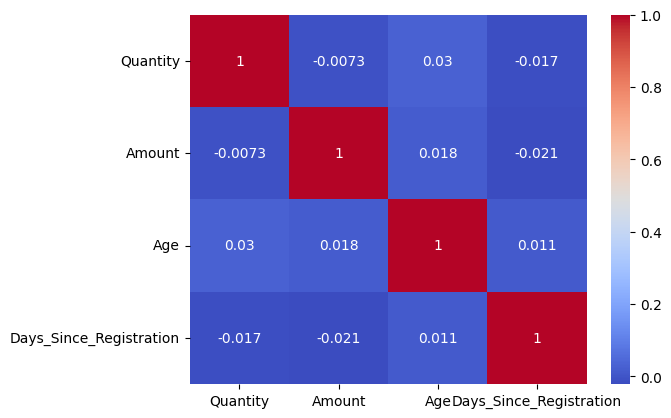

In [170]:
# [78] seaborn を使って、merged_dfの数値カラム間の相関行列をヒートマップで可視化
import seaborn as sns
import matplotlib.pyplot as plt

numeric_sales_df = merged_df.select_dtypes(include = "number") #数字型のカラムだけを取得
correelation_matrix = numeric_sales_df.corr() #相関係数
sns.heatmap(correelation_matrix, annot=True, cmap="coolwarm")


In [172]:
# [79] plotlyを使って、merged_dfの数値カラム間の相関行列をヒートマップで可視化
import plotly.express as px

fig = px.imshow(correelation_matrix, text_auto=True, color_continuous_scale= "RdBu_r")
fig.show()

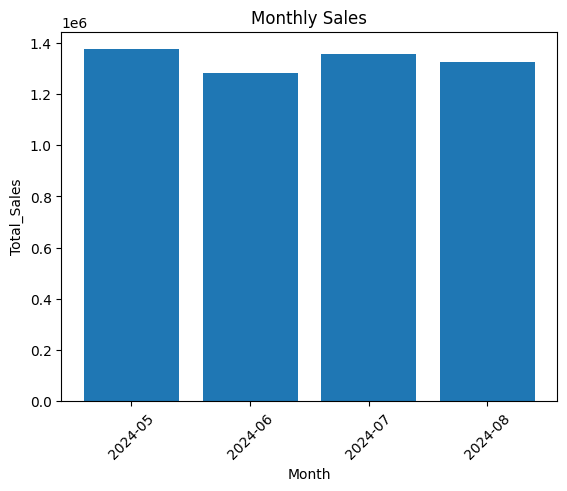

In [177]:
# [80] matplotlib を使って、月ごとの合計Amountを棒グラフで表示
monthly_sales = sales_df.groupby(sales_df["Transaction_Date"].dt.to_period("M"))["Amount"].sum().reset_index()
monthly_sales
plt.bar(monthly_sales["Transaction_Date"].astype(str), monthly_sales["Amount"])
plt.xticks(rotation=45) #45度回転させかぶらないようにする
plt.xlabel("Month")
plt.ylabel("Total_Sales")
plt.title("Monthly Sales")
plt.show()